# Un peu de calcul en Python

Il existe deux principales manières d'effectuer du calcul avec un ordinateur :

* le calcul approximatif, également appelé **calcul en [virgule flottante](https://fr.wikipedia.org/wiki/Virgule_flottante)**, et
* le calcul formel, également appelé [**calcul symbolique**](https://fr.wikipedia.org/wiki/Calcul_formel).

On va voir comment effectuer ces deux types de calcul en Python.

## 1. Calcul en virgule flottante

On s'intéresse à la représentation de la fraction $\displaystyle \frac{1}{3}$ en Python.

**Question 1 : Exécutez les cellules ci-dessous. Que constatez-vous ?**

In [1]:
format(1 / 3)

'0.3333333333333333'

In [2]:
format(1 / 3, '.16f')

'0.3333333333333333'

In [3]:
format(1 / 3, '.32f')

'0.33333333333333331482961625624739'

In [4]:
format(1 / 3, '.100f')

'0.3333333333333333148296162562473909929394721984863281250000000000000000000000000000000000000000000000'

In [5]:
format(1 / 3 * 1e10, '.100f')

'3333333333.3333330154418945312500000000000000000000000000000000000000000000000000000000000000000000000000000000'

In [6]:
format(1 / 3 * 1e-10, '.100f')

'0.0000000000333333333333333345477399105165913859721849021866546536330133676528930664062500000000000000'

**Réponse** : On constate que les premières décimales d'un nombre flottant sont correctes, mais à partir d'un certain rang elles ne le sont plus. À partir d'un certain rang, il n'y a même plus de décimales non nulles.

On explique ce comportement par le fait que les nombres flottants en Python sont représentés avec $64$ bits (un bit vaut $0$ ou $1$) de la manière suivante :

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/IEEE_754_Double_Floating_Point_Format.svg">

* $\text{sign}$ donne le signe du nombre flottant
* $e$ est l'exposant biaisé : $e \in \{1, \ldots, 2046\}$
* $(b_1, \ldots, b_{52})$ est la mantisse

La valeur du nombre flottant est obtenue avec la formule suivante :
$$
    (-1)^{\text{sign}}\left(1 + \sum_{i=1}^{52} b_{52-i} 2^{-i} \right)\times 2^{e-1023}
$$

L'[epsilon machine](https://fr.wikipedia.org/wiki/Epsilon_d%27une_machine), correspondant à la limite supérieure de l'erreur d'approximation relative causé par l'arrondi des calculs du microprocesseur en arithmétique à virgule flottante, est égal à :
$$
    \varepsilon_\text{machine} = 2^{-52} \approx 2.22 \times 10^{-16}
$$

Avec l'arrondi au plus proche, la précision est
$
    \displaystyle\frac{\varepsilon_\text{machine}}{2} = 2^{-53} \approx 1.11 \times 10^{-16}
$
soit environ **15.95 chiffres significatifs** (entre 15 et 17 en pratique).

**Question 2 : Exécutez la cellule ci-dessous. Que constatez-vous ? Utilisez la fonction [`format()`](https://docs.python.org/fr/3.13/library/functions.html#format) pour expliquer le résultat obtenu.**

In [7]:
0.1 + 0.2 == 0.3

False

In [8]:
format(0.1 + 0.2, '.64f')

'0.3000000000000000444089209850062616169452667236328125000000000000'

In [9]:
format(0.3, '.64f')

'0.2999999999999999888977697537484345957636833190917968750000000000'

**Réponse** : On constate bien que les nombres flottants `0.1 + 0.2` et `0.3` ne sont pas égaux.

## 2. Calcul symbolique

Le calcul symbolique fait référence au développement d'algorithmes permettant de manipuler des expressions mathématiques et d'autres objets mathématiques. Le calcul symbolique intègre les mathématiques et l'informatique pour résoudre des expressions mathématiques à l'aide de symboles mathématiques. Un système de calcul formel tel que SymPy évalue les expressions algébriques de manière exacte (et non approximative) à l'aide des mêmes symboles que ceux utilisés dans la méthode manuelle traditionnelle.

Le paquet SymPy est installé sous le nom `sympy`.
On importe le paquet `sympy` sous l'alias `sp` (convention utilisée par tout le monde).
On pourra ensuite utiliser les fonctionnalités du module `sympy` en les précédant par `sp.`

In [10]:
import sympy as sp

### 2.1 Définition de variables (symboles)

Avant de pouvoir faire quoi que ce soit, il est nécessaire de définir les variables que l'on va utiliser.
En SymPy, on ne parle pas de variables mais de **symboles**.
On utilise la classe [`sympy.Symbol()`](https://docs.sympy.org/latest/modules/core.html#module-sympy.core.symbol) pour créer des symboles.

In [11]:
x = sp.Symbol("x")

Avec le code ci-dessous, on a effectué plusieurs choses :

* À gauche du signe égal, on a défini une variable Python appelée `x`
* À droite du signe égal, dans la classe `sympy.Symbol()`, on a fourni en argument la chaîne de caractères `"x"` qui indique le nom sous lequel la variable est affichée dans les expressions mathématiques.

Pour afficher la représentation d'un symbole, il suffit d'exécuter une cellule où la dernière ligne est la variable Python correspondante :

In [12]:
x

x

On peut rajouter des contraintes sur le symbole, lors de sa création, pour indiquer l'ensemble mathématique auquel la variable appartient :
* `real` pour indiquer que la variable est un nombre réel (et pas complexe),
* `integer` pour indiquer la variable est un nombre entier,
* `positive` pour indiquer que la variable est strictement positive,
* `negative` pour indiquer que la variable est strictement négative,
* `nonnegative` pour indiquer que la variable est positive ou nulle,
* `nonpositive` pour indiquer que la variable est négative ou nulle.

In [13]:
y = sp.Symbol("y", real=True, positive=True)  # y est un réel strictement positif
z = sp.Symbol("z", real=True, negative=True)  # z est un réel strictement négatif

### 2.2 Expressions mathématiques

Une fois que l'on a défini des symboles, on peut définir des expressions mathématiques faisant intervenir ces symboles.
Pour ce faire, on utilise la même syntaxe que celle utilisée pour les nombres Python :

* `+` pour la somme
* `-` pour la différence
* `*` pour la multiplication
* `/` pour la division
* `**` pour la puissance

Par exemple, maintenant que l'on a défini les symboles `x` et `y`, on peut définir l'expression $x^2 + y^2$ en utilisant la syntaxe Python correspondante :

In [14]:
expr = x ** 2 + y ** 2
expr

x**2 + y**2

### 2.3 Fonctions mathématiques

Toutes les fonctions mathématiques *classiques* sont définies dans le module `sympy` :
* [`sp.exp()`](https://docs.sympy.org/latest/modules/functions/elementary.html#sympy.functions.elementary.exponential.exp) correspond à la fonction $\exp$,
* [`sp.log()`](https://docs.sympy.org/latest/modules/functions/elementary.html#sympy.functions.elementary.exponential.log) correspond à la fonction $\ln$,
* [`sp.cos()`](https://docs.sympy.org/latest/modules/functions/elementary.html#sympy.functions.elementary.trigonometric.cos) correspond à la fonction $\cos$,
* [`sp.sin()`](https://docs.sympy.org/latest/modules/functions/elementary.html#sympy.functions.elementary.trigonometric.sin) correspond à la fonction $\sin$,
* etc.

Vous pouvez bien entendu les utiliser dans les expressions.

In [15]:
sp.cos(x) + sp.sin(x)

sin(x) + cos(x)

### 2.4 Substitutions

Le principe de substitution est de remplacer une ou plusieurs variables par une ou plusieurs autres variables.
On le fait avec la méthode [`.subs()`](https://docs.sympy.org/latest/modules/core.html#sympy.core.basic.Basic.subs).

In [16]:
expr.subs(x, y)  # on remplace x par y dans expr

2*y**2

In [17]:
expr.subs({x: z ** 2, y: z})  # on remplace x par z ** 2 et y par z dans expr

z**4 + z**2

### 2.5 Simplification d'expressions

Pour simplifier des expressions, on utilise la fonction [`sympy.simplify()`](https://docs.sympy.org/latest/modules/simplify/simplify.html#sympy.simplify.simplify.simplify).

In [18]:
sp.simplify(sp.cos(x) ** 2 + sp.sin(x) ** 2)

1

### 2.6 Développement et factorisation d'expressions


* Pour développer des expressions, on utilise la fonction [`sympy.expand()`](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.expand).
* Pour factoriser des expressions, on utilise la fonction [`sympy.factor()`](https://docs.sympy.org/latest/modules/polys/reference.html#sympy.polys.polytools.factor).

In [19]:
sp.expand((x - 2) ** 3)

x**3 - 6*x**2 + 12*x - 8

In [20]:
sp.factor(x ** 2 - 4)

(x - 2)*(x + 2)

### 2.7 Affichage de la courbe d'une fonction

Pour afficher la courbe d'une fonction, on utilise la fonction [`sympy.plot()`](https://docs.sympy.org/latest/modules/plotting.html).

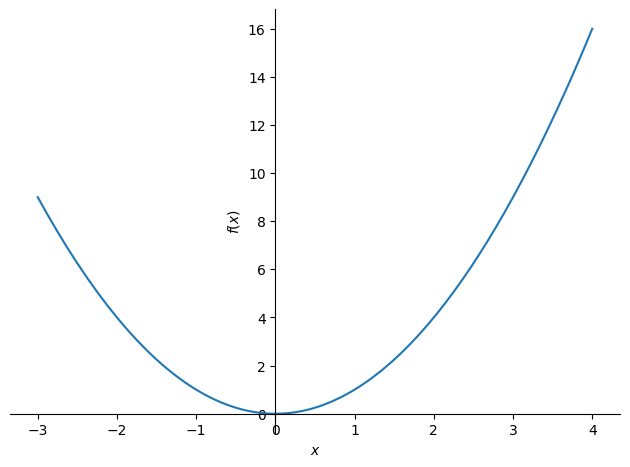

In [21]:
sp.plot(x ** 2, (x, -3, 4));

### 2.8 Résolution d'une équation

Pour résoudre l'équation `expr == 0`, on utilise la fonction [`sympy.solve()`](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve).
Remarquez que SymPy prend en compte l'ensemble de définitions des symboles et renvoie des résultats différents en fonction des symboles utilisés.

In [22]:
sp.solve(x ** 2 - 4, x)  # Le x indique qu'on résoud l'équation par rapport à x

[-2, 2]

In [23]:
sp.solve(y ** 2 - 4, y)

[2]

In [24]:
sp.solve(z ** 2 - 4, z)

[-2]

In [25]:
sp.solve(x ** 2 - z, x)

[-sqrt(z), sqrt(z)]

In [26]:
sp.solve(x ** 2 + z, x)

[-sqrt(-z), sqrt(-z)]

In [27]:
sp.solve(y ** 2 - z, y)

[]

In [28]:
sp.solve(y ** 2 + z, y)

[sqrt(-z)]

### 2.9 Résolution d'un système d'équations

Pour résoudre un système d'équations, on utilise également la fonction [`sympy.solve()`](https://docs.sympy.org/latest/modules/solvers/solvers.html#sympy.solvers.solvers.solve), mais en fournissant une liste d'expressions (représentant le système d'équations) et une liste de symboles (représentant les variables) en arguments :

In [29]:
sp.solve([x + y - 3, x - y + 3], [x, y])

{x: 0, y: 3}

### 2.10 Évaluation approximative d'une expression

Pour obtenir l'évaluation approximative d'une expression, on utilise la méthode [`.evalf()`](https://docs.sympy.org/latest/modules/core.html#module-sympy.core.evalf) :

In [30]:
(sp.pi ** 2 / 4).evalf()

2.46740110027234

### 2.11 Dérivée d'une expression

Pour calculer la dérivée d'une expression, on utilise la fonction [`sympy.diff()`](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.diff).

In [31]:
sp.diff(sp.cos(x) ** 2 + sp.sin(x), x)

-2*sin(x)*cos(x) + cos(x)

### 2.12 Primitive d'une expression

Pour calculer une primitive d'une expression, on utilise la fonction [`sympy.integrate()`](https://docs.sympy.org/latest/modules/integrals/integrals.html).

In [32]:
sp.integrate(- 2 * sp.sin(x) * sp.cos(x) + sp.cos(x), x)

-sin(x)**2 + sin(x)

### 2.13 Limites d'une expression

Pour calculer la limite d'une expression en un point donné, on utilise la fonction [`sympy.limit()`](https://docs.sympy.org/latest/modules/series/series.html#sympy.series.limits.limit).

In [33]:
sp.limit(1 / x, x, 0, '+')

oo

In [34]:
sp.limit(1 / x, x, 0, '-')

-oo

### 2.14 Intégrales

* L'infini ($\infty$) est représenté par `sympy.oo`.
* Pour calculer des intégrales, on utilise également la fonction [`sympy.integrate()`](https://docs.sympy.org/latest/modules/integrals/integrals.html).

In [35]:
sp.integrate(sp.exp(-x), (x, 0, sp.oo))

1

In [36]:
sp.integrate(sp.sin(x) / x, (x, 0, sp.oo))

pi/2

In [37]:
sp.integrate(sp.exp(-x), (x, y, z))

-exp(-z) + exp(-y)

### 2.15 Parties réelles et imaginaires de nombres complexes

* Le nombre complexe $i$ est représenté par `sympy.I`.
* Pour obtenir la partie réelle d'un nombre complexe, on utilise la fonction [`sympy.re()`](https://docs.sympy.org/latest/modules/functions/elementary.html#sympy.functions.elementary.complexes.re).
* Pour obtenir la partie imaginaire d'un nombre complexe, on utilise la fonction [`sympy.im()`](https://docs.sympy.org/latest/modules/functions/elementary.html#sympy.functions.elementary.complexes.im).
* Pour obtenir les parties réelle et imaginaire d'un nombre complexe, on peut utiliser la méthode [`.as_real_imag()`](https://docs.sympy.org/latest/modules/core.html#sympy.core.expr.Expr.as_real_imag).

In [38]:
expr = ((1 + sp.I * sp.sqrt(3)) / (1 + sp.I)) ** 20
expr

(1 - I)**20*(1 + sqrt(3)*I)**20/1048576

In [39]:
sp.re(expr)

512

In [40]:
sp.im(expr)

-512*sqrt(3)

In [41]:
expr.as_real_imag()

(512, -512*sqrt(3))

### 2.16 Équations différentielles

Pour résoudre des équations différentielles, on utilise la classe [`sympy.Function()`](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.Function) pour définir une fonction et la fonction [`sympy.dsolve()`](https://docs.sympy.org/latest/modules/solvers/ode.html#sympy.solvers.ode.dsolve) pour résoudre l'équation différentielle.

Par exemple, pour résoudre l'équation différentielle :
$$
    \forall x \in \mathbb{R}, \; f'(x) = f(x)
$$

In [42]:
f = sp.Function('f')
sp.dsolve(sp.diff(f(x), x) - f(x), f(x))

Eq(f(x), C1*exp(x))

## 3. Exercices

### Exercice 1

Déterminez la relation entre la hauteur $h$ et le rayon $r$ d'un cylindre de manière à minimiser son aire à volume fixé.

**Réponse théorique** :

* Le volume $V$ du cylindre est :
$$
    V = \pi r^2 h
$$
* L'aire $A$ du cylindre est :
$$
    A = 2 \pi r^2 + 2 \pi r h
$$

* On utilise le fait que le volume est fixé pour exprimer la hauteur en fonction du volume et du rayon :
$$
    h = \frac{V}{\pi r^2}
$$

* On remplace $h$ par sa nouvelle valeur dans l'équation de l'aire du cylindre :
$$
    A(r) = 2 \pi r^2 + 2 \pi r h \frac{V}{\pi r^2} = 2 \pi r^2 + 2 \frac{V}{r}
$$

* On constate le comportement suivant aux limites $0$ et $+\infty$ :
$$
    \lim_{r \to 0} A(r) = +\infty \qquad\text{et}\qquad \lim_{r \to +\infty} A(r) = +\infty
$$

* On calcule la dérivée de $A$ :
$$
\frac{\mathrm{d}A}{\mathrm{d}r}(r) = 4 \pi r - 2 \frac{V}{r^2}
$$

* On en déduit le signe de la dérivée :
$$
    \frac{\mathrm{d}A}{\mathrm{d}r} \geq 0 
    \Longleftrightarrow r^2 \frac{\mathrm{d}A}{\mathrm{d}r} \geq 0
    \Longleftrightarrow 4 \pi r^3 - 2 V \geq 0
    \Longleftrightarrow r \geq \sqrt[3]{\frac{V}{2 \pi}}
$$

* La fonction $A$ est donc strictement décroissante sur $\displaystyle \left] 0, \sqrt[3]{\frac{V}{2 \pi}} \right[$ et strictement croissante sur $\displaystyle \left] \sqrt[3]{\frac{V}{2 \pi}}, +\infty \right[$. Elle atteint donc son minimum en :
$$
    r = \sqrt[3]{\frac{V}{2 \pi}}
$$

* On remplace $V$ par sa valeur :
$$
    r = \sqrt[3]{\frac{\pi r^2 h}{2 \pi}}
$$

* On simplifie l'expression pour isoler $r$ dans le membre de gauche et $h$ dans le membre de droite :
$$
    r = \sqrt[3]{\frac{\pi r^2 h}{2 \pi}}
    \Longleftrightarrow r^3 = \frac{\pi r^2 h}{2 \pi}
    \Longleftrightarrow r = \frac{h}{2}
$$


**Réponse avec SymPy** :

In [43]:
# Définitions des variables
r = sp.Symbol("r", real=True, positive=True)
h = sp.Symbol("h", real=True, positive=True)
V = sp.Symbol("V", real=True, positive=True)

# Définition des formules de l'aire et du volume
A_formule = 2 * sp.pi * (r ** 2) + 2 * sp.pi * r * h
V_formule = sp.pi * (r ** 2) * h

# On exprime h en fonction de r et de V en résolvant l'équation V_formule = V
h_opt = sp.solve(V_formule - V, h)[0]

# On remplace h par sa nouvelle valeur dans la formule de l'aire
A_formule = A_formule.subs(h, h_opt)

# On détermine quand l'expression A_formule est minimale en cherchant quand sa dérivée est nulle
r_opt = sp.solve(sp.diff(A_formule, r), r)[0]

# On remplace V par sa formule dans r_opt
r_opt = r_opt.subs(V, V_formule)

# On résoud l'équation r_opt = r
r_opt = sp.solve(r_opt - r, r)[0]

# On affiche le résultat
print(f"r = {r_opt}")

r = h/2


### Exercice 2

*Cet exercice correspond à un exercice typique de probabilités de l'épreuve de spécialité mathématiques du baccalauréat général. Il est tombé au baccalauréat Asie de 2024. Le sujet complet peut être téléchargé [ici](https://www.education.gouv.fr/media/195452/download). 
**La première partie a été ajoutée pour faire davantage de programmation en Python**.*

*Léa passe une bonne partie de ses journées à jouer à un jeu vidéo et s’intéresse aux chances de victoire de ses prochaines parties.
Elle estime que si elle vient de gagner une partie, elle gagne la suivante dans 70% des cas.
Mais si elle vient de subir une défaite, d’après elle, la probabilité qu’elle gagne la suivante
est de 0,2.
De plus, elle pense avoir autant de chance de gagner la première partie que de la perdre.*

On s’appuiera sur les affirmations de Léa pour répondre aux questions de cet exercice.

Pour tout entier naturel $n$ non nul, on définit les événements suivants :

* $G_n$ : « Léa gagne la $n$-ième partie de la journée » ;
* $D_n$ : « Léa perd la 𝑛-ième partie de la journée ».

Pour tout entier naturel $n$ non nul, on note $g_n$ la probabilité de l’événement $G_n$.
On a donc $g_1 = 0,5$.

**Partie A : Analyse empirique du problème**

Sans perdre de généralité, **on représente une victoire par un $1$ et une défaite par un $0$**.
On utilise la fonction [`random.choices()`](https://docs.python.org/fr/3.13/library/random.html#random.choices) pour générer des variables aléatoires réelles.

**Question 1** : En regardant la documentation de cette fonction et les exemples ci-dessous, déterminer comment on va pouvoir simuler les parties de Léa.

In [44]:
import random

random.choices(population=[0, 1], weights=[0.3, 0.7], k=1)[0]

0

In [45]:
random.choices(population=[0, 1], weights=[0.8, 0.2], k=1)[0]

0

**Réponse** :
* L'argument `population` indique l'ensemble des valeurs parmi lesquelles tirer.
* L'argument `weights` indique la probabilité de chaque élément de la population d'être tiré.
* L'argument `k` correspond au nombre de tirages effectués.

**Question 2** : Copier et compléter le code manquant dans la fonction `simuler_partie_suivante(partie_precedente)`, qui simule le résultat de la partie suivante sachant le résultat de la partie précédente :

```python
def simuler_partie_suivante(partie_precedente):
    if ...:
        weights = ...
    else:
        weights = ...
    return random.choices(population=[0, 1], weights=weights, k=1)[0]
```

**Réponse** :

In [46]:
def simuler_partie_suivante(partie_precedente):
    if partie_precedente == 0:
        weights = [0.8, 0.2]
    else:
        weights = [0.3, 0.7]
    return random.choices(population=[0, 1], weights=weights, k=1)[0]

**Question 3** : Copier et compléter le code manquant dans la fonction `simuler_parties(n)`, qui simule le résultat des $n$ premières parties de Léa. On supposera que $n$ est un entier naturel supérieur ou égal à 1.

```python
def simuler_parties(n):
    # On sauvegarde tous les résultats dans une liste
    res = []
    
    # On simule la première partie
    premiere_partie = ...
    
    # On ajoute le résultat de la première partie à la liste
    res.append(premiere_partie)
    
    # Pour chaque partie suivante
    for _ in range(n - 1):
        
        # On récupère le résultat de la dernière partie
        partie_precedente = res[-1]
        
        # On simule la partie suivante
        partie_suivante = ...
        
        # On ajoute le résultat de la partie suivante à la liste
        res.append(partie_suivante)
        
    # On renvoie la liste des résultats
    return res
```

**Réponse** :

In [47]:
def simuler_parties(n):
    # On sauvegarde tous les résultats dans une liste
    res = []
    
    # On simule la première partie
    premiere_partie = random.choices(population=[0, 1], weights=[0.5, 0.5], k=1)[0]
    
    # On ajoute le résultat de la première partie à la liste
    res.append(premiere_partie)
    
    # Pour chaque partie suivante
    for _ in range(n - 1):
        
        # On récupère le résultat de la dernière partie
        partie_precedente = res[-1]
        
        # On simule la partie suivante
        partie_suivante = simuler_partie_suivante(partie_precedente)
        
        # On ajoute le résultat de la partie suivante à la liste
        res.append(partie_suivante)
        
    # On renvoie la liste des résultats
    return res

**Question 4** : Copier et compléter le code manquant dans la fonction `simuler_journees(k, n)`, qui simule les résultats des $n$ premières parties de Léa sur $k$ jours. On supposera que $k$ et $n$ sont des entiers naturels supérieurs ou égaux à 1.

```python
import numpy as np

def simuler_journees(k, n):
    # Sauvegarder les résultats dans une liste
    res = []

    # Pour chaque jour
    for _ in range(k):

        # Simuler les parties de la journée
        journee = ...
        
        # Ajouter les résultats à la liste
        res.append(journee)

    # Renvoyer la liste sous la forme d'un tableau NumPy
    return np.array(res)
```

**Réponse** :

In [48]:
import numpy as np

def simuler_journees(k, n):
    # Sauvegarder les résultats dans une liste
    res = []

    # Pour chaque jour
    for _ in range(k):

        # Simuler les parties de la journée
        journee = simuler_parties(n)
        
        # Ajouter les résultats à la liste
        res.append(journee)

    # Renvoyer la liste sous la forme d'un tableau NumPy
    return np.array(res)

On récupére les résultats de Léa pour $10\,000$ journées avec $100$ parties par jour.

In [49]:
res = simuler_journees(k=10_000, n=100)

`res` est un tableau NumPy, qui est un outil efficace pour représenter des données tabulaires numériques. Ici, `res` est une matrice :

* La ligne $n$ représente toutes les parties de la $n$-ième journée.
* La colonne $n$ représente toutes les $n$-ième parties sur les différentes journées.

On commence à compter à partir de 0 en Python. Par exemple :
* `res[0]` est la première ligne de la matrice, ce qui donne les résultats de toutes les parties de la première journée.
* `res[:, 0]` est la première colonne de la matrice, ce qui donne les résultats des premières parties sur toutes les journées.

La méthode [`.mean()`](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) permet de calculer la valeur moyenne d'un tableau NumPy.

On calcule la proportion de victoires à la deuxième partie sachant que Léa a gagné la première partie : 

In [50]:
res[res[:, 0] == 1, 1].mean()

0.7005615724027277

On calcule la proportion de victoires de Léa à la deuxième partie :

In [51]:
res[:, 1].mean()

0.4482

On calcule la proportion de victoires de Léa à la dernière partie :

In [52]:
res[:, -1].mean()

0.3982

**Partie B : Analyse théorique du problème**

**Question 1** : Quelle est la valeur de la probabilité conditionnelle $P_{G_{1}}(D_2)$ ?

**Réponse** : D'après l'énoncé, *Léa estime que si elle vient de gagner une partie, elle gagne la suivante dans 70% des cas.* Donc la probabilité d'une défaite après une victoire est égale à $0,3$.

**Question 2** : Calculer $g_2$. Comparer ce résultat avec celui obtenu empiriquement dans la partie A.

**Réponse** :
$$
    g_2 = P(G_2) = P(G_2 \cap G_1) + P(G_2 \cap D_1) = P_{G_1}(G_2) P(G_1) + P_{D_1}(G_2) P(D_1) = 0,7 \times 0,5 + 0,2 \times 0,5 = 0,45
$$

**Question 3** : Montrer que, pour tout entier naturel $n$ non nul, $g_{n+1} = 0,5 \times g_n + 0,2$.

**Réponse** :

$$
    g_{n+1} = P(G_{n+1}) = P(G_{n+1} \cap G_n) + P(G_{n+1} \cap D_n) = P_{G_n}(G_{n+1}) P(G_n) + P_{D_n}(G_{n+1}) P(D_n) = 0,7 \times g_n + 0,2 \times (1 - g_n) = 0,5 \times g_n + 0,2
$$

Pour tout entier naturel $n$ non nul, on pose $v_n = g_n - 0,4$

**Question 4** : Montrer que la suite $(v_n)$ est géométrique. On précisera son premier terme et sa raison.

**Réponse** :

$$
    \forall n \geq 1, \; v_{n+1} = g_{n+1} - 0,4 = 0,5 g_n + 0,2 - 0,4 = 0,5 (v_n + 0,4) - 0,2 = 0,5 \times v_n
$$

Donc $(v_n)$ est une suite géométrique dont :
* le premier terme est $v_1 = g_1 - 0,4 = 0,5 - 0,4 = 0,1$, et
* la raison est $0,5$.

**Question 5** : Montrer que, pour tout entier naturel $n$ non nul : $g_n = 0,1 \times 0,5^{n-1} + 0,4$.

**Réponse** :
$$
    \forall n \geq 1, \; v_n = 0,1 \times 0,5^{n-1} \quad\text{et}\quad v_n = g_n - 0,4
$$
Donc :
$$
    \forall n \geq 1, \; g_n = 0,1 \times 0,5^{n-1} + 0,4
$$

**Question 6** : Étudier les variations de la suite $(g_n)$

In [53]:
n = sp.Symbol("x", real=True, positive=True)
g = 0.1 * 0.5 ** (n - 1) + 0.4

In [54]:
sp.solve(sp.diff(g, n), n)

[]

In [55]:
sp.diff(g, n).subs(n, 1)

-0.0693147180559945

**Réponse** :

* *Version 1* : Le premier terme est strictement positif et la raison est strictement comprise entre $0$ et $1$, donc la suite est strictement décroissante.
* *Version 2* : La dérivée est strictement négative, donc la suite est décroissante.

**Question 7** : Donner, en la justifiant, la limite de la suite $(g_n)$. Comparer ce résultat à celui obtenu empiriquement dans la partie A.

In [56]:
sp.limit(g, n, sp.oo)

2/5

**Question 8** : Déterminer, par le calcul, le plus petit entier $n$ tel que $g_n - 0,4 \leq 0,001$.

In [57]:
sp.solve(g - 0.4 - 0.001, n)

[7.64385618977472]

In [58]:
g.subs(n, 7) - 0.4 <= 0.001

False

In [59]:
g.subs(n, 8) - 0.4 <= 0.001

True

**Question 9** : Recopier et compléter les lignes 4, 5, et 6 de la fonction Python suivante, qui renvoie le plus petit rang à partir duquel les termes de la suite $(g_n)$ sont tous inférieurs ou égaux à $0,4 + e$, où $e$ est un nombre réel strictement positif.

```python
def seuil(e):
    g = 0.5
    n = 1
    while ...:
        g = 0.5 * g + 0.2
        n = ...
    return n
```

**Réponse** :

In [60]:
def seuil(e):
    g = 0.5
    n = 1
    while g - 0.4 > e:
        g = 0.5 * g + 0.2
        n += 1
    return n

In [61]:
seuil(0.001)

8

### Exercice 3

*Cet exercice correspond à un exercice typique d'analyse de l'épreuve de spécialité mathématiques du baccalauréat général.
Il est tombé au baccalauréat Asie de 2024.
**Certaines quesions sont légèrement modifiées par rapport au sujet original.**
Le sujet complet peut être téléchargé [ici](https://www.education.gouv.fr/media/195452/download).*

* On considère la fonction $𝑓$ définie sur $]0 ; +\infty[$ par $f(x) = x^2 - x \ln(x)$.
* On admet que $f$ est deux fois dérivable sur $]0 ; +\infty[$.
* On note $f'$ la fonction dérivée de la fonction $f$ et $f''$ la fonction dérivée de la fonction $f'$.

#### Partie A : Étude de la fonction $f$

**Question 1** : Déterminer les limites de la fonction $f$ en $0$ et $+\infty$.

In [62]:
x = sp.Symbol("x", real=True, positive=True)
f = x ** 2 - x * sp.log(x)

In [63]:
sp.limit(f, x, 0)

0

In [64]:
sp.limit(f, x, sp.oo)

oo

**Question 2** : Pour tout réel $x$ strictement positif, calculer $f'(x)$.

In [65]:
f_prime = sp.diff(f, x)
f_prime

2*x - log(x) - 1

**Question 3** : Montrer que pour tout réel $x$ strictement positif :
$$
    f''(x) = \frac{2x - 1}{x}
$$

In [66]:
f_seconde = sp.diff(f, x, 2)
f_seconde

2 - 1/x

**Question 4** : Étudier les variations de la fonction $f'$ sur $]0, +\infty[$, puis dresser le tableau de variations de la fonction $f'$ sur $]0, +\infty[$.

In [67]:
sp.solve(f_seconde, x)

[1/2]

In [68]:
sp.sign(f_seconde.subs(x, sp.Rational(1, 4)))

-1

In [69]:
sp.sign(f_seconde.subs(x, sp.Rational(3, 4)))

1

**Réponse** :

* $f''$ est strictement négative sur $\left] 0, \frac{1}{2} \right[$ et strictement positive sur $\left] \frac{1}{2}, +\infty \right[$.
* $f'$ est donc strictement décroissante sur $\left] 0, \frac{1}{2} \right[$ et strictement croissante sur $\left] \frac{1}{2}, +\infty \right[$.

**Question 5** : Montrer que la fonction $f$ est strictement croissante sur $]0, +\infty[$.

In [70]:
sp.solve(f_prime, x)

[]

In [71]:
sp.sign(f_prime.subs(x, sp.Rational(1, 2)))

1

**Réponse** :

* Le minimum de $f'$ sur $]0, \infty[$ est donc atteint en $\frac{1}{2}$.
* $f'(\frac{1}{2}) = - \ln(\frac{1}{2}) = \ln(2) > 0$
* $f'$ est donc strictement positive $]0, +\infty[$.
* $f$ est donc stricement croissante sur $]0, +\infty[$.

#### Partie B : Étude d'une fonction auxiliaire pour la résolution de l'équation $f(x) = x$

* On considère dans cette partie la fonction $g$ définie sur $]0, +\infty[$ par $g(x) = x - \ln(x)$.
* On admet que la fonction $g$ est dérivable $]0, +\infty[$, on note $g'$ sa dérivée.

**Question 1** : Pour tout réel strictement positif, calculer $g'(x)$, puis dresser le tableau des variations de la fonction $g$. Les limites de la fonction $g$ aux bornes de l'intervalle de définition ne sont pas attendues.

In [72]:
g = x - sp.log(x)
g_prime = sp.diff(g, x)
g_prime

1 - 1/x

In [73]:
sp.solve(g_prime, x)

[1]

In [74]:
sp.sign(g_prime.subs(x, sp.Rational(1, 2)))

-1

In [75]:
sp.sign(g_prime.subs(x, sp.Rational(3, 2)))

1

In [76]:
g.subs(x, 1)

1

**Réponse** :

* $g'$ s'annule uniquement en 1, est strictement négative sur $]0, 1[$ et strictement positive sur $]1, +\infty[$.
* $g$ est donc strictement décroissante sur $]0, 1[$ et strictement croissante sur $]1, +\infty[$. $g(1) = 1$

**Question 2** : On admet que $1$ est l'unique solution de l'équation $g(x) = 1$. Résoudre, sur l'intervalle $]0, +\infty[$, l'équation $f(x) = x$.

In [77]:
sp.solve(f - x, x)

[1]

**Réponse** : $1$ est donc l'unique solution de l'équation $f(x) = x$ car :

$$
    \forall x > 0, \; g(x) = 1 \Longleftrightarrow x g(x) = x \Longleftrightarrow f(x) = x
$$

#### Partie C : Étude d'une suite récurrente

On considère la suite $(u_n)$ définie par $u_0 = \frac{1}{2}$ et pour tout entier naturel $n$,
$$
    u_{n+1} = f(u_n) = u_n^2 - u_n \ln(u_n).
$$

**Question 1** : Montrer par récurrence que pour tout entier naturel $n$ : $\frac{1}{2} \leq u_n \leq u_{n+1} \leq 1$.

**Réponse** :

* Initialisation :
    + $u_1 = f(u_0) = \frac{1}{4} - \frac{1}{2} \ln(\frac{1}{2}) = \frac{1}{4} + \frac{\ln(2)}{2}$
    + $0 \leq \frac{\ln(2)}{2} \leq \frac{\ln(e)}{2} = \frac{1}{2}$
    + Donc $\frac{1}{2} \leq u_0 \leq u_1 = \frac{1}{4} + \frac{\ln(2)}{2} \leq \frac{1}{4} + \frac{1}{2} \leq 1$

* Récurrence : Supposons que $\frac{1}{2} \leq u_n \leq u_{n+1} \leq 1$ pour un entier naturel $n$. Alors :
    + La fonction $f$ étant strictement croissante sur $]0, +\infty[$, on a :
    $$
        f(\frac{1}{2}) \leq f(u_n) \leq f(u_{n+1}) \leq f(1)
    $$
    + $f(\frac{1}{2}) = f(u_0) = u_1 \geq \frac{1}{2}$ (prouvé à l'initialisation)
    + $f(1) = 1$ d'après la question B.2
    + $f(u_n) = u_{n+1}$ et $f(u_{n+1}) = u_{n+2}$ par définition
    + On a donc :
    $$
        \frac{1}{2} \leq u_{n+1} \leq u_{n+2} \leq 1
    $$


**Question 2** : Justifier que la suite $(u_n)$ converge.

**Réponse** : La suite $(u_n)$ est croissante et majorée, donc elle converge.

On appelle $l$ la limite de la suite $(u_n)$ et on admet que $l$ vérifie l'égalité $f(l) = l$.

**Question 3** : Déterminer la valeur de $l$.

**Réponse** : D'après la question B.2, l'unique solution de l'équation $f(x) = x$ sur l'intervalle $]0, +\infty[$ est $1$. Par conséquent, $l= 1$.